In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data = np.loadtxt('train.csv',delimiter = ',')

In [5]:
X = data[:,0:13]
Y = data[:,13]

In [6]:
X

array([[-0.40784991, -0.48772236, -1.2660231 , ..., -0.30309415,
         0.41057102, -1.09799011],
       [-0.40737368, -0.48772236,  0.24705682, ...,  0.1130321 ,
         0.29116915, -0.52047412],
       [ 0.1251786 , -0.48772236,  1.01599907, ...,  0.80657583,
        -3.79579542,  0.89107588],
       ...,
       [-0.40831101, -0.48772236,  0.24705682, ...,  0.1130321 ,
         0.33206621, -0.33404299],
       [-0.41061997, -0.48772236, -1.15221381, ..., -0.71922039,
         0.203235  , -0.74475218],
       [ 0.34290895, -0.48772236,  1.01599907, ...,  0.80657583,
         0.38787479, -1.35871335]])

In [7]:
X.shape,Y.shape

((379, 13), (379,))

In [11]:
X_ = np.append(X,np.ones(X.shape[0]).reshape(-1,1),axis=1)
X_.shape

(379, 14)

In [13]:
def cost(X_train,m,Y_train):
    cost_ = 0
    N = X_train.shape[0]
    for i in range(N):
        cost_ += (1/N)*((Y_train[i]-((X_train[i]*m).sum()))**2)
    return cost_

In [12]:
def step_gradient(X_train,Y_train,m,lr):
    
    slope_m = np.zeros(X_train.shape[1])
    N = X_train.shape[0]
    
    for i in range(N):
        slope_m += (2/N)*(Y_train[i]-(m*X_train[i]).sum())*(-X_train[i])
        
    m = m - (lr * slope_m)
    
    return m

In [14]:
def fit(X_train,Y_train,lr=0.001,epochs=100,verbose=False):
    m = np.zeros(X_train.shape[1])
    last_m = m
    cost_array = []
    unit = epochs//100
    for i in range(epochs+1):
        last_m = m
        m = step_gradient(X_train,Y_train,m,lr)
        cost_ = cost(X_train,m,Y_train)
        
        #verbose is used to only show the learning process if required, else it is False by default
        if verbose and i%unit==0:
            print("epoch:",i,"cost:",cost_)
            cost_array.append(cost_)
    
    #To continue the learning loop incase the current epoch and learning parameters doesn't lead to saturation
    cont = input("Do you want to continue?:")
        
    while cont=="y":
        clear_output(wait=True)
        epochs = int(input("Enter the number of epochs to continue for:"))
        unit = int(input("Enter the unit point for epochs:"))
        lr_factor = float(input("Enter the decay factor for the learning rate:"))
        lr*=lr_factor
        for i in range(epochs+1):
            last_m = m
            m = step_gradient(X_train,Y_train,m,lr)
            cost_ = cost(X_train,m,Y_train)
            if verbose and i%unit==0:
                print("epoch:",i,"cost:",cost_)
                cost_array.append(cost_)
        cont = input("Do you want to continue?:")
        
    return m,cost_array

In [15]:
def predict(X_test,m):
    y_pred = []
    for i in range(X_test.shape[0]):
        y_pred.append((X_test[i]*m).sum())
    return np.array(y_pred)

In [16]:
def score(Y_true,Y_pred):
    u = ((Y_true-Y_pred)**2).sum()
    v = ((Y_true-(Y_true.mean()))**2).sum()
    return 1-(u/v)

In [17]:
m, cost_array = fit(X_,Y,epochs=1000,lr=0.15,verbose=True)
print(m)

epoch: 0 cost: 305.53967546632305
epoch: 10 cost: 26.035424639196286
epoch: 20 cost: 24.05526359128313
epoch: 30 cost: 23.72115625347802
epoch: 40 cost: 23.60303729356514
epoch: 50 cost: 23.54741986623927
epoch: 60 cost: 23.517122638574207
epoch: 70 cost: 23.499079608798997
epoch: 80 cost: 23.487749544693703
epoch: 90 cost: 23.4804221040931
epoch: 100 cost: 23.47560851802726
epoch: 110 cost: 23.47242059705668
epoch: 120 cost: 23.470300523451847
epoch: 130 cost: 23.46888761376366
epoch: 140 cost: 23.467944973060014
epoch: 150 cost: 23.467315733110677
epoch: 160 cost: 23.46689557990056
epoch: 170 cost: 23.466614997225978
epoch: 180 cost: 23.46642760762816
epoch: 190 cost: 23.466302453222962
epoch: 200 cost: 23.46621886309809
epoch: 210 cost: 23.466163033053636
epoch: 220 cost: 23.46612574385092
epoch: 230 cost: 23.466100838119264
epoch: 240 cost: 23.466084203377466
epoch: 250 cost: 23.466073092890188
epoch: 260 cost: 23.46606567209765
epoch: 270 cost: 23.466060715683955
epoch: 280 cost: 

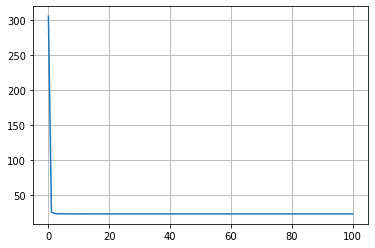

In [18]:
plt.plot(cost_array)
plt.grid()
plt.show()

In [19]:
y_pred = predict(X_,m)
y_pred.shape

(379,)

In [20]:
score(Y,y_pred)

0.7331366627280995

In [21]:
X_test = np.loadtxt("test.csv",delimiter=",")

In [22]:
X_test_ = np.append(X_test,np.ones(X_test.shape[0]).reshape(-1,1),axis=1)


In [23]:
X_test_.shape

(127, 14)

In [24]:
y_pred_test = predict(X_test_,m)

In [25]:
y_pred_test

array([12.43328344, 29.03367318, 22.37164455, 24.47778655, 20.60166977,
        2.72533175, 30.40000409, 24.86120042, 18.65724977, 23.53985837,
       24.11396872, 17.71143854, 17.44000298, 21.65356278, 42.31137694,
       23.84974493, 24.47573232, 27.53872655, 20.23606694, 31.15155454,
       23.78237905, 25.00979443, 33.95768541, 36.43515649, 32.04098329,
       16.71322632, 23.47176611, 32.93828009, 25.1807008 , 33.71008685,
       16.88580202, 26.02760837, 23.27040025, 25.47758968, 15.00946631,
       29.5857494 , 26.24821245, 20.37245654, 24.43681498,  9.44706894,
        8.38096654, 29.01392345, 29.59085403, 19.7575697 , 20.3719679 ,
        3.14442625, 39.52420118, 25.71741222, 30.37729627, 16.79453264,
       17.89088652, 41.02574533, 17.57238787, 20.89662584, 15.59837696,
       21.41394912, 18.4543645 , 23.15576391, 13.67245022, 17.23573882,
       15.02710365, 29.15131353, 25.17166387, 25.49749375, 17.21186687,
       17.42936995, 34.70372763, 17.01340803, 27.10724289, 22.54

In [26]:
np.savetxt('pred_boston.csv',y_pred_test)